<a href="https://colab.research.google.com/github/kingmohamedtr-max/Mushroom-project-/blob/main/Copy_of_Logistic_Regression_BAN_1_%E2%80%94_START.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Graduate School Admission

### Get the Data

* admit = target variable, admitted = 1, denied = 0
* gre - GRE score: 200 to 800
* ses - Socio Economic status: 1 = low, 2 = med, 3 = high
* gender - Gender: 0 = female, 1 = male
* race - Race: unknown scale, 3 separate race catagories
* rank - Undergraduate college rank: quartile



In [ ]:
df_college = pd.read_csv('https://raw.githubusercontent.com/iamctodd/datasets/refs/heads/main/college.csv')
df_college.head(2)

,admit,gre,gpa,ses,gender,race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3


### EDA

In [ ]:
# groupby admit
df_college.groupby('admit').count()

,gre,gpa,ses,gender,race,rank
admit,,,,,,
0,273,273,273,273,273,273
1,127,127,127,127,127,127


In [ ]:
df_college.groupby('admit').mean()

,gre,gpa,ses,gender,race,rank
admit,,,,,,
0,573.186813,3.343700,2.018315,0.483516,1.996337,2.641026
1,618.897638,3.489213,1.937008,0.456693,1.889764,2.149606


In [ ]:
df_college.groupby('admit').median()

,gre,gpa,ses,gender,race,rank
admit,,,,,,
0,580.0,3.34,2.0,0.0,2.0,3.0
1,620.0,3.54,2.0,0.0,2.0,2.0


### Univariate

<Axes: xlabel='gre', ylabel='Count'>

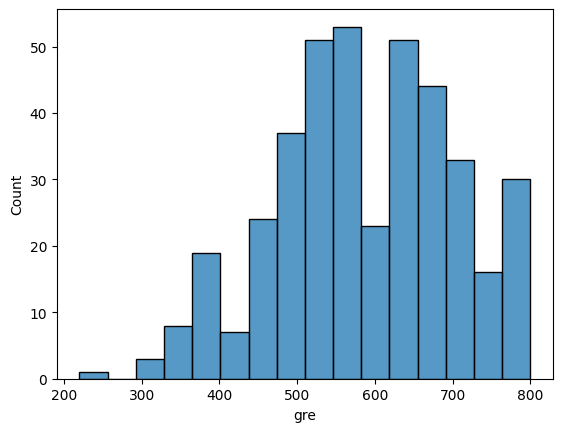

In [ ]:
# Histograms
sns.histplot(data=df_college, x='gre')

<Axes: xlabel='gpa', ylabel='Count'>

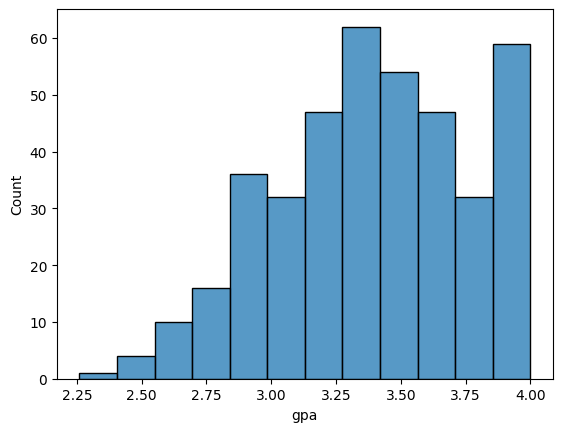

In [ ]:
sns.histplot(data=df_college, x='gpa')

<Axes: xlabel='gre'>

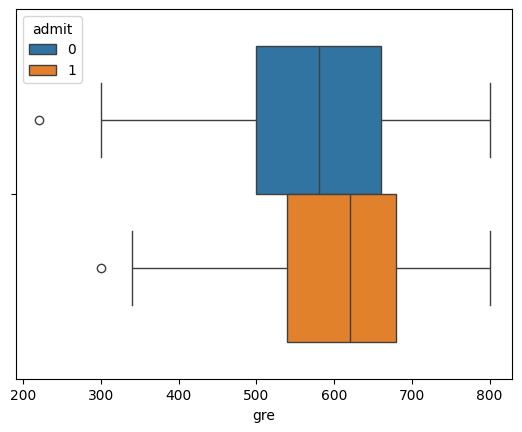

In [ ]:
# Boxplots
sns.boxplot(data=df_college, x='gre', hue='admit')

<Axes: xlabel='gpa'>

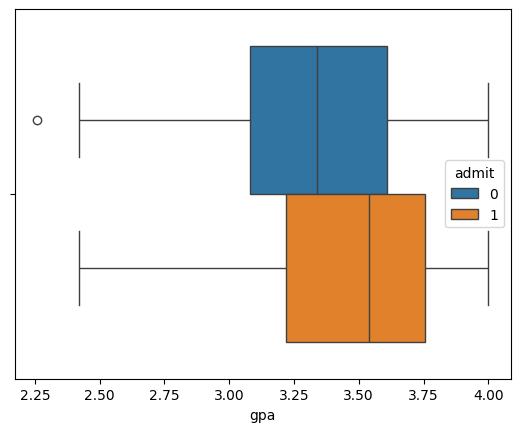

In [ ]:
sns.boxplot(data=df_college, x='gpa', hue='admit')

<Axes: xlabel='gpa', ylabel='gre'>

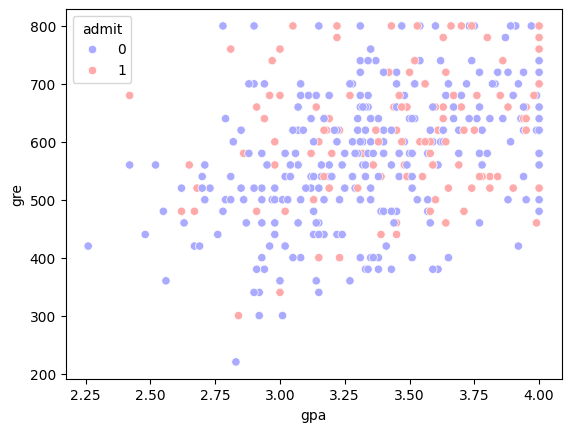

In [ ]:
# Bivariate Analysis
sns.scatterplot(data=df_college, x='gpa', y='gre', hue='admit', palette='bwr')

### Multivariate


In [ ]:
corr = df_college.corr()
display(corr)

,admit,gre,gpa,ses,gender,race,rank
admit,1.000000,0.184434,0.178212,-0.046858,-0.025004,-0.060335,-0.242513
gre,0.184434,1.000000,0.384266,-0.033182,0.006813,-0.047028,-0.123447
gpa,0.178212,0.384266,1.000000,0.006838,-0.017136,0.058303,-0.057461
ses,-0.046858,-0.033182,0.006838,1.000000,-0.028355,-0.053121,0.008055
gender,-0.025004,0.006813,-0.017136,-0.028355,1.000000,-0.054035,-0.027333
race,-0.060335,-0.047028,0.058303,-0.053121,-0.054035,1.000000,0.036342
rank,-0.242513,-0.123447,-0.057461,0.008055,-0.027333,0.036342,1.000000


<Axes: >

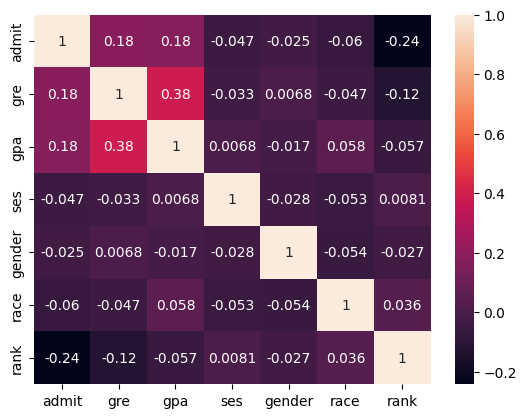

In [ ]:
sns.heatmap(corr, annot=True)

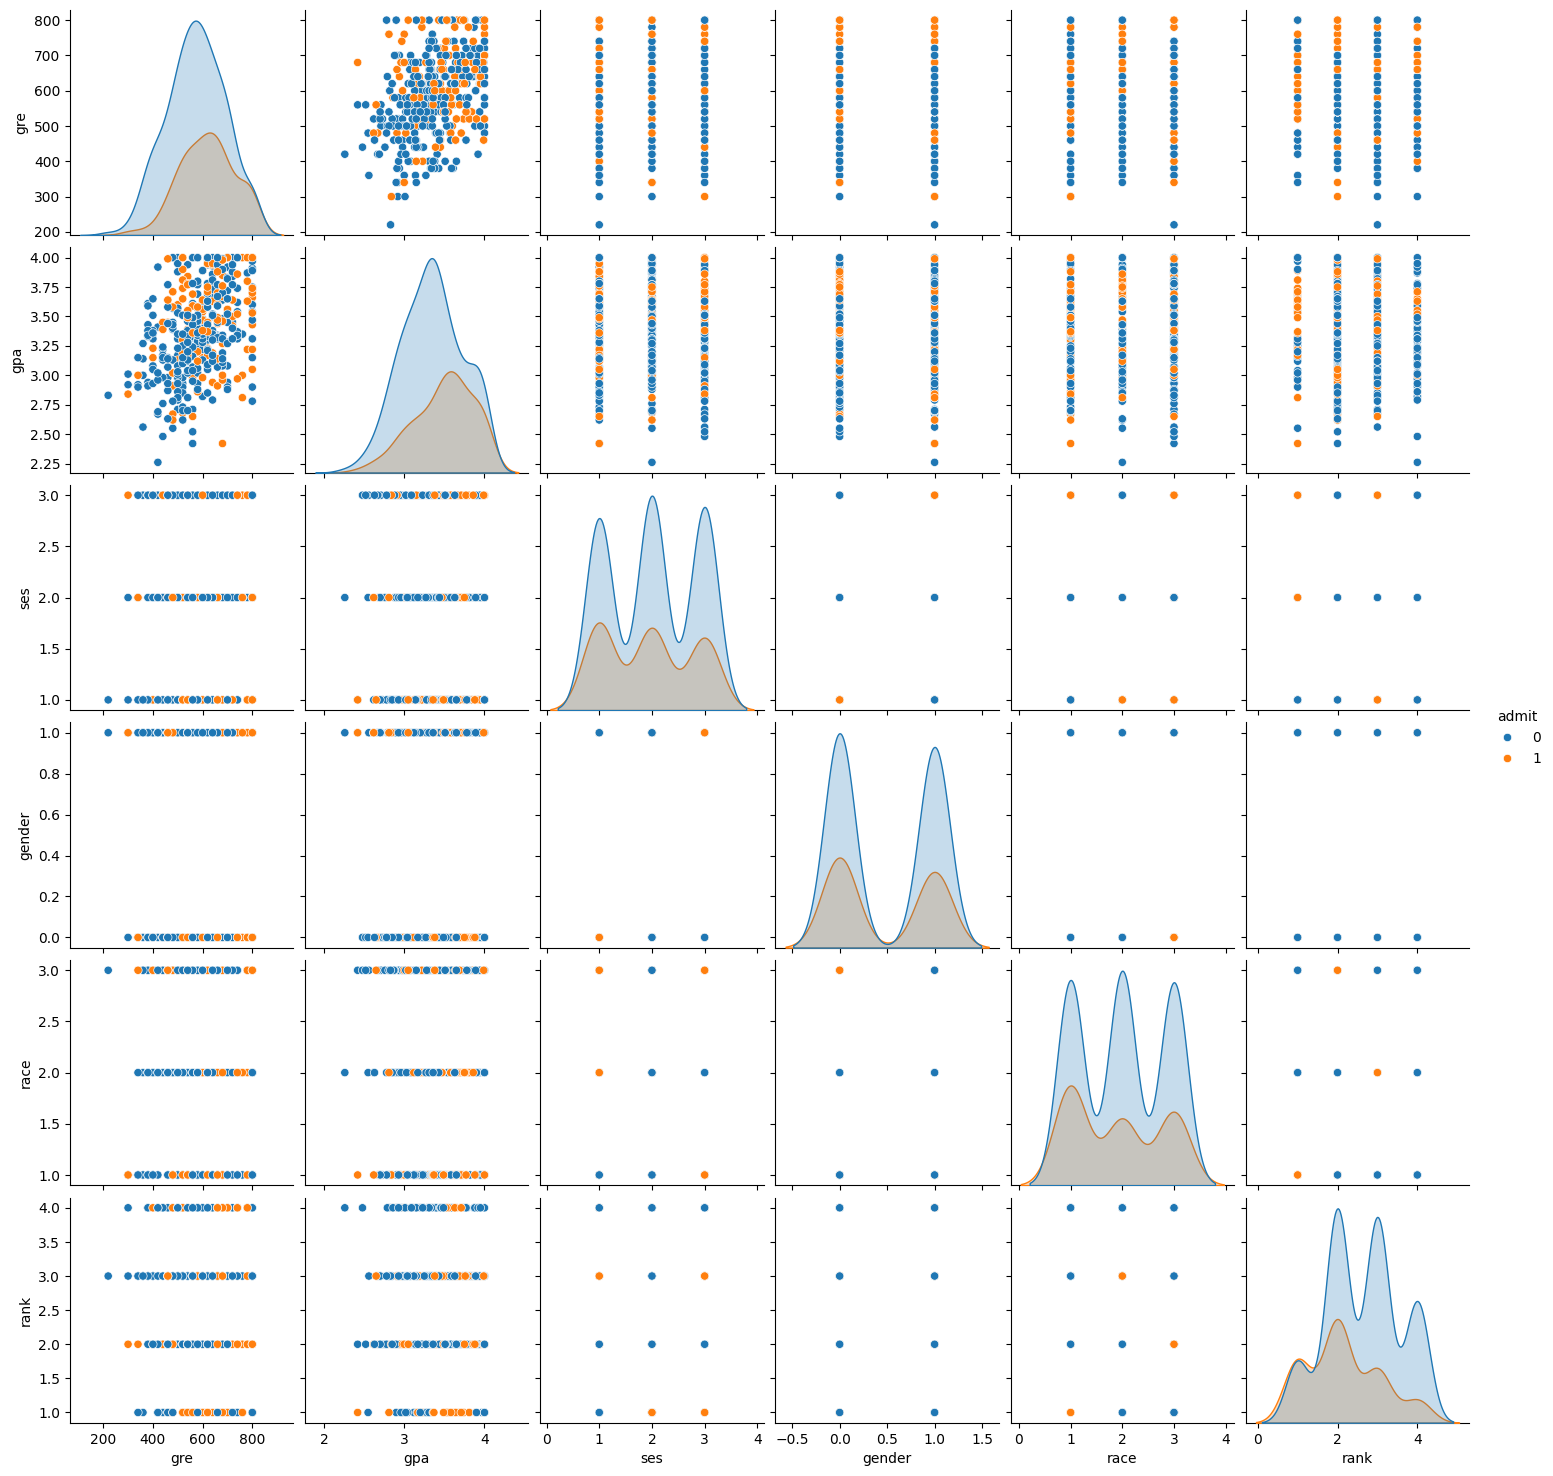

In [ ]:
# pairplot
sns.pairplot(data=df_college, hue='admit')

### Naive Model - "Base" - No tuning, no feature selection


In [ ]:
# logr = LogisticRegression(max_iter=1000)
logr = LogisticRegression(max_iter=1000)

In [ ]:
# Setup  X and y
x = df_college.drop('admit', axis=1)
y = df_college['admit']
# Split the data into x_train y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Setup  X and y
x = df_college.drop('admit', axis=1) # axis=1 drops the admit column
y = df_college['admit']
# Split the data into x_train y_train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Changed X to x

In [ ]:
# model1= log.fit(X_train, y_train)
model1 = logr.fit(X_train, y_train) # Changed 'log' to 'logr'
y_pred = model1.predict(X_test)

In [ ]:
# Accuracy and Precision
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred)) # Changed 'Precision_score' to 'precision_score'

Accuracy: 0.6625
Precision: 0.5


### Confusion Matrix

In [ ]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[50,  3],
       [24,  3]])

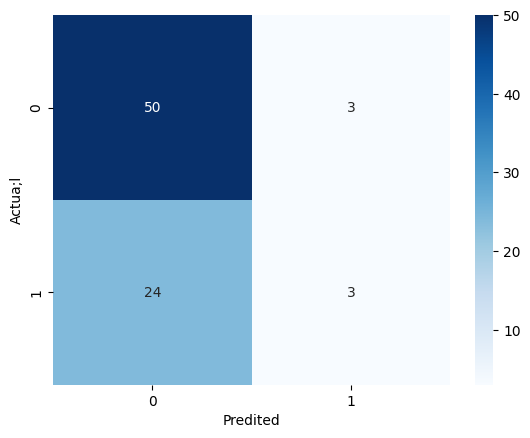

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predited')
plt.ylabel('Actua;l')
plt.show()

### ROC Curve


In [ ]:
# Calc true positive and false positive rates


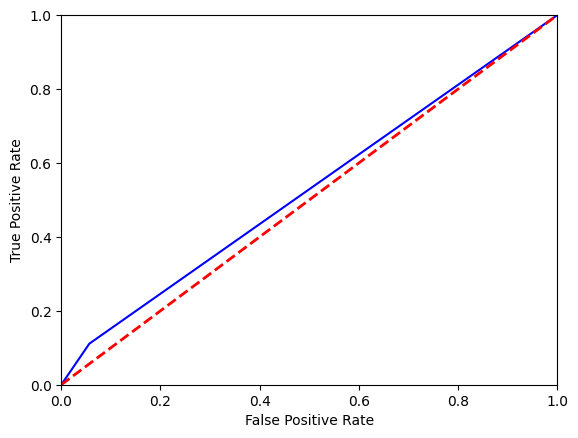

In [ ]:
# Generate a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = (fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### Scale the features


In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
# run the model again
scaled_model = LogisticRegression(max_iter=1000)
model2 = logr.fit(X_train_scaled, y_train)
y_pred_scaled

NameError: name 'y_pred_scaled' is not defined

### Feature Selection


In [ ]:
# @title
# Feature Importance
from sklearn.feature_selection import SelectKBest, chi2
# Feature Selection using SelectKBest and chi2
X = df_college.drop('admit', axis=1)
y = df_college['admit']
bestfeatures = SelectKBest(score_func=chi2, k=5) # Choose the top 5 features
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

# Print the features with scores
display(featureScores.nlargest(5,'Score')) #print 5 best features

,Features,Score
0,gre,308.168893
5,rank,8.423343
1,gpa,0.541406
4,race,0.501641
2,ses,0.287584


In [ ]:
# Make a model with GRE and Rank only
X_GRE_Rank = df_college.drop(['ses', 'race', 'gpa'], axis=1) # Pass labels as a list


In [ ]:
X_GRE_Rank.head(3)

,admit,gre,gender,rank
0,0,380,0,3
1,1,660,0,3
2,1,800,0,1


# Credit Card Fraudulent Payment Predictor

In [ ]:
# dataset description: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X1 = default_of_credit_card_clients.data.features
y1 = default_of_credit_card_clients.data.targets

# convert into a dataframe
credit = pd.concat([X1, y1], axis=1)

credit.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  Y       300

# EDA

In [ ]:
credit.groupby('X1').mean()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,,,,,,,,,,,,,,,,,,,,,
10000,1.379310,2.150101,1.728195,32.720081,0.464503,0.484787,0.458418,0.407708,0.332657,0.241379,...,6777.393509,6539.977688,5960.229209,1432.346856,1289.221095,1039.924949,877.882353,620.308316,757.531440,0.399594
16000,1.500000,3.500000,1.000000,47.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,17497.000000,18891.000000,19190.000000,1500.000000,2044.500000,1598.000000,1682.500000,750.000000,1000.000000,0.000000
20000,1.438259,2.093117,1.673583,33.609818,0.441296,0.457996,0.427126,0.314777,0.191296,0.072874,...,12616.254555,11941.556680,10929.073887,1817.331984,1823.651822,1430.174595,1229.376012,1243.019231,1194.323887,0.353239
30000,1.631677,2.124224,1.604348,34.098137,0.550932,0.531056,0.495031,0.367702,0.304348,0.250932,...,18838.690062,18133.496273,16473.874534,2176.449068,1955.164596,1782.763354,1801.197516,1490.706832,1411.852795,0.352795
40000,1.621739,1.895652,1.556522,33.721739,0.408696,0.478261,0.486957,0.460870,0.413043,0.304348,...,23510.139130,23282.456522,22419.339130,2026.073913,2168.934783,2819.482609,2395.447826,2071.860870,1677.060870,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750000,2.000000,1.750000,1.250000,38.000000,-0.500000,-1.000000,-0.750000,-0.750000,-0.750000,-1.000000,...,144356.500000,132830.500000,141068.000000,92975.250000,120416.000000,28283.000000,39187.750000,143285.500000,51083.500000,0.000000
760000,1.000000,3.000000,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,469931.000000,474421.000000,480598.000000,20011.000000,19500.000000,19019.000000,18003.000000,20000.000000,22000.000000,0.000000
780000,1.500000,1.500000,1.500000,44.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,108303.000000,128750.000000,186941.000000,36409.500000,27281.000000,16102.000000,45048.500000,97175.000000,16349.000000,0.000000


In [ ]:
credit.groupby('X1').median()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,,,,,,,,,,,,,,,,,,,,,
10000,1.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8138.0,8256.0,7621.0,1200.0,1136.0,600.0,340.0,345.0,200.0,0.0
16000,1.5,3.5,1.0,47.0,1.0,1.0,0.0,0.0,0.0,1.0,...,17497.0,18891.0,19190.0,1500.0,2044.5,1598.0,1682.5,750.0,1000.0,0.0
20000,1.0,2.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15288.5,14229.0,12324.0,1332.0,1300.0,1000.0,639.0,654.5,500.0,0.0
30000,2.0,2.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22721.0,21348.0,18766.0,1521.5,1500.0,1139.0,1000.0,1000.0,800.0,0.0
40000,2.0,2.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25101.0,24503.5,24401.0,1700.0,1600.0,1382.0,1212.5,1087.5,1000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750000,2.0,1.5,1.0,40.5,-0.5,-1.0,-1.0,-0.5,-1.0,-1.0,...,69722.5,60276.0,74950.0,57542.0,39165.5,23334.5,30927.0,75119.5,39860.5,0.0
760000,1.0,3.0,1.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,469931.0,474421.0,480598.0,20011.0,19500.0,19019.0,18003.0,20000.0,22000.0,0.0
780000,1.5,1.5,1.5,44.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,108303.0,128750.0,186941.0,36409.5,27281.0,16102.0,45048.5,97175.0,16349.0,0.0


# Univariate

<Axes: xlabel='X2', ylabel='Count'>

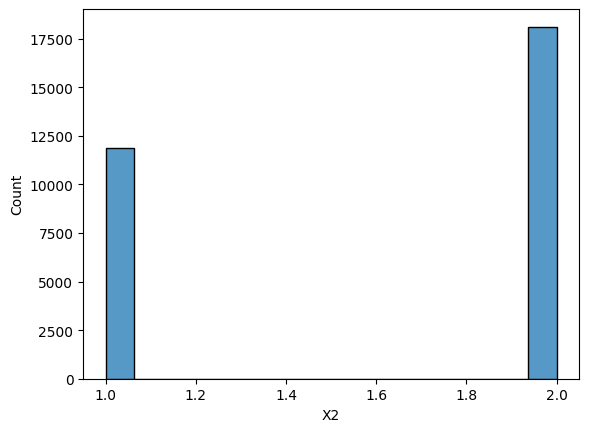

In [ ]:
# histograms
sns.histplot(data=credit, x='X2')

<Axes: xlabel='X3', ylabel='Count'>

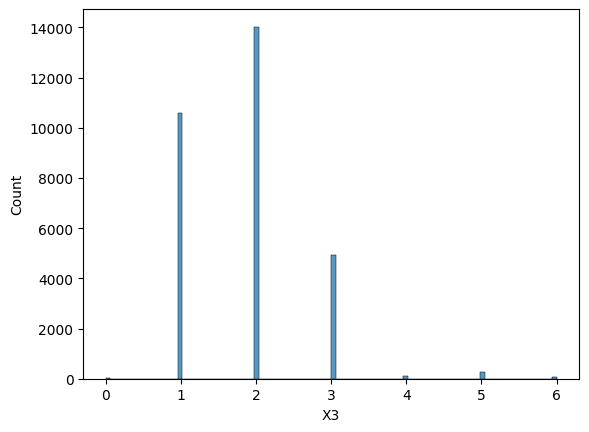

In [ ]:
sns.histplot(data=credit, x='X3')

<Axes: xlabel='X2'>

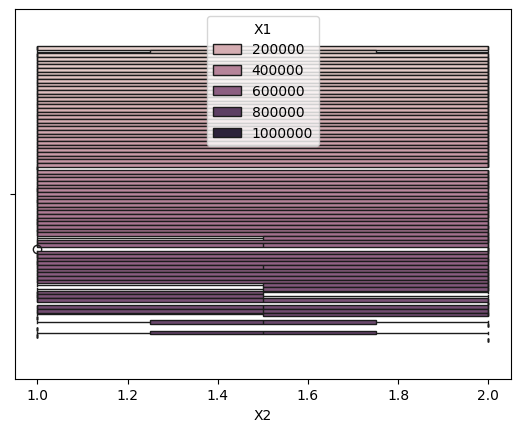

In [ ]:
# Boxplots
sns.boxplot(data=credit, x='X2', hue='X1')

<Axes: xlabel='X3'>

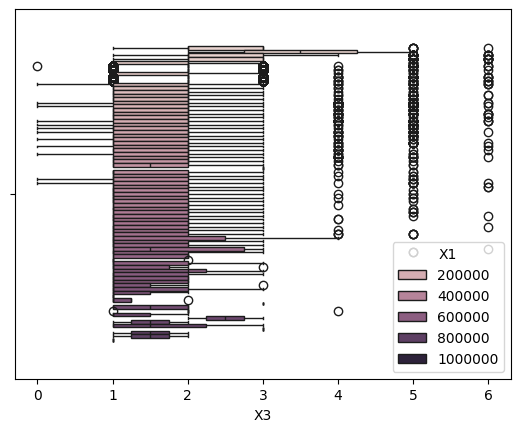

In [ ]:
sns.boxplot(data=credit, x='X3', hue='X1')

# Bivariate

<Axes: xlabel='X1', ylabel='X2'>

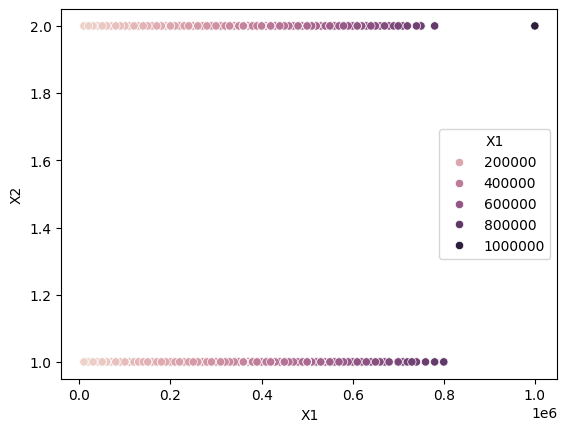

In [ ]:
sns.scatterplot(data=credit, x='X1', y='X2', hue='X1')

#multivariate

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data=credit, hue='X1')

# Naive Model

In [ ]:
# Import the necessary class
from sklearn.linear_model import LogisticRegression

# Logistic regression with the corrected parameter name
LogisticRegression(max_iter=350)

LogisticRegression(max_iter=350)

In [ ]:
# Setup  X and y
x = credit.drop('X1', axis=1)
y = credit['X1']
# Split the data into x_train y_train
from sklearn.model_selection import train_test_split # Import the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Changed X to x

In [ ]:
# model1= log.fit(X_train, y_train)
# Create an instance of LogisticRegression
logr = LogisticRegression(max_iter=350)
model1 = logr.fit(X_train, y_train)  # Use the instance to fit the model
y_pred = model1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted')) # Changed 'Precision_score' to 'precision_score' and added average='weighted'

Accuracy: 0.08083333333333333
Precision: 0.03616292280718884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Predicting Marketing Efficacy for a Bank

* y = target var: did the user accept the marketing offer?


In [ ]:
url = "https://raw.githubusercontent.com/iamctodd/datasets/refs/heads/main/bank.csv"
bank = pd.read_csv(url)

In [ ]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


# Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[ 0,  2,  7, ...,  0,  0,  0],
       [ 0,  1, 17, ...,  0,  0,  1],
       [ 0,  1,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

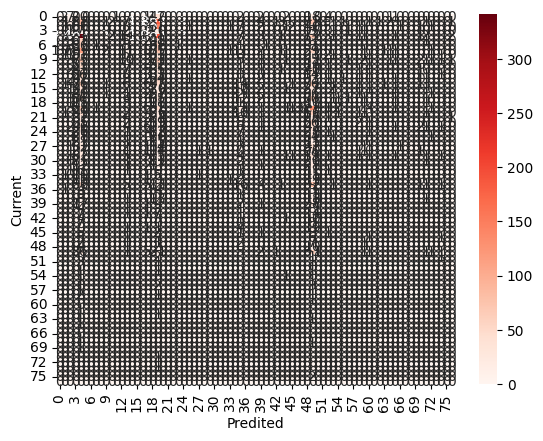

In [ ]:
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predited')
plt.ylabel('Current')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


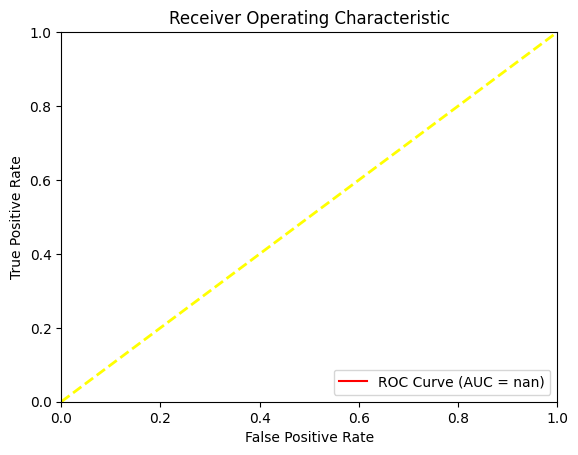

In [ ]:
# Assuming y_pred currently holds multi-class predictions
# If it holds continuous values, then roc_auc_score can be used directly

# Get predicted probabilities for the positive class (assuming class 1 is positive)
# This works if y_pred is the output of predict_proba.
# Otherwise if y_pred is a continuous variable, then it can be used directly as y_score
y_score = y_pred # If y_pred is continuous, otherwise replace with probabilities for positive class

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)  # Specify positive label (adjust if necessary)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Scale Features

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)